Dataset : https://data.world/rajeevsharma993/movie-reviews

In [68]:
import pandas as pd
import numpy as np

data=pd.read_csv('moviereviews2.tsv',sep='\t')
data.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   6000 non-null   object
 1   review  5980 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [70]:
#checking null values
data.isnull().sum()

label      0
review    20
dtype: int64

In [71]:
# empty = []
# for i, l, r in data.itertuples():
#   if type(r) == str:
#     if r.isalnum():
#       empty.append(i)
# empty

In [72]:
#removing null values
emp = data["review"].isnull()
emp.head()

0    False
1    False
2    False
3    False
4    False
Name: review, dtype: bool

In [73]:

empty_ind = emp[emp== True].index
empty_ind

Int64Index([ 825,  895, 1889, 2038, 2260, 2452, 2713, 2980, 3182, 3250, 3394,
            3784, 4012, 4180, 4423, 4637, 4886, 4893, 5227, 5846],
           dtype='int64')

In [74]:
data.drop(empty_ind, inplace =True)
data.isnull().sum()

label     0
review    0
dtype: int64

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

x= data["review"]
y = data["label"]

x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=42,test_size=0.25, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4485,), (1495,), (4485,), (1495,))

In [76]:
#creating pipeline for TfidfVectorizer and LinearSVC model.

pipe = Pipeline([("tfidf", TfidfVectorizer()),("model",LinearSVC())])
pipe.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LinearSVC())])

In [77]:
#making prediction
pred = pipe.predict(x_test)
pred

array(['neg', 'pos', 'pos', ..., 'pos', 'neg', 'pos'], dtype=object)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"accuracy_score : {accuracy_score(y_test, pred)*100}")
print("confusion_matrix : ")
print(confusion_matrix(y_test, pred))

accuracy_score : 92.44147157190635
confusion_matrix : 
[[684  68]
 [ 45 698]]


In [79]:
print("classification_report :")
print(classification_report(y_test, pred))

classification_report :
              precision    recall  f1-score   support

         neg       0.94      0.91      0.92       752
         pos       0.91      0.94      0.93       743

    accuracy                           0.92      1495
   macro avg       0.92      0.92      0.92      1495
weighted avg       0.92      0.92      0.92      1495



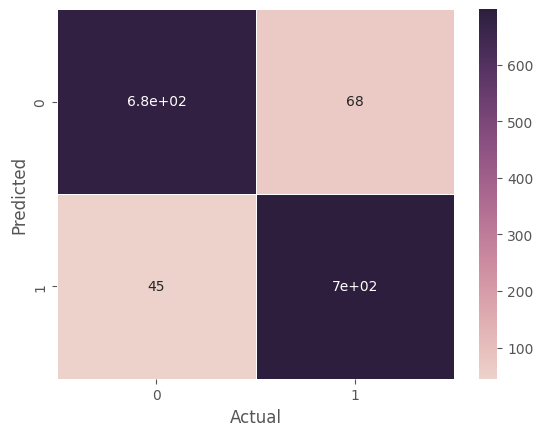

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
ax = sns.heatmap(confusion_matrix(y_test, pred), annot =True, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set(xlabel="Actual", ylabel="Predicted");

In [81]:
#creating pipeline for TfidfVectorizer and LinearSVC model. Used GridSearchCV for hyperparameter tuning for LinearSVC model

from sklearn.model_selection import GridSearchCV

parameters = { "penalty":["l1", "l2"],'C':[1,2,3,6]}
pipe_new = Pipeline([("tfidf", TfidfVectorizer()),("model",GridSearchCV(LinearSVC(), parameters))])

pipe_new.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model',
                 GridSearchCV(estimator=LinearSVC(),
                              param_grid={'C': [1, 2, 3, 6],
                                          'penalty': ['l1', 'l2']}))])

In [82]:
pred = pipe_new.predict(x_test)
pred

array(['neg', 'pos', 'pos', ..., 'pos', 'neg', 'pos'], dtype=object)

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"accuracy_score : {accuracy_score(y_test, pred)*100}")
print("confusion_matrix : ")
print(confusion_matrix(y_test, pred))

accuracy_score : 92.44147157190635
confusion_matrix : 
[[684  68]
 [ 45 698]]


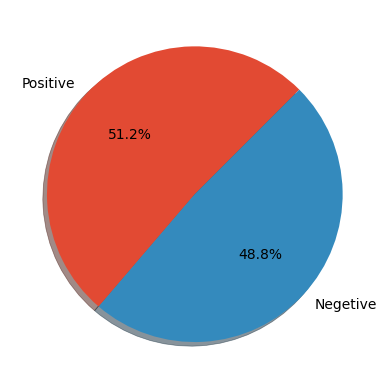

In [84]:
result = pd.DataFrame(pred)[0].value_counts()
plt.pie(list(result),  labels= ["Positive","Negetive"], autopct='%1.1f%%', shadow=True, startangle=45);
